In [118]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
data = pd.read_csv('../data/cleaned_data.csv')
data.columns

Index(['phone_brand', 'phone_model', 'storage', 'ram', 'Launch', 'Weight',
       'Display_Resolution', 'NFC', 'BATTERY', 'Features_Sensors', 'GPU',
       'Foldable', 'PPI_Density', 'price_USD', 'Length', 'Width', 'Height',
       'Ratio', 'Screen_Tech', 'Screen_Refresh_Rate', 'USB_Type',
       'USB_Version', 'Num_Color_Options', 'Supported_Video_Resolutions',
       'Chipset_Manufacturer', 'Chipset_(nm)', 'Num_CPU_Cores'],
      dtype='object')

# EDA and Data Transformation

## 1. Distribution of columns

### 1.1. `phone_brand`: str/ category

In [119]:
groupdata = {}
groupdata['phone_brand'] = data.groupby('phone_brand').size().sort_values(ascending=False)
print(groupdata['phone_brand'])
# cut the data with # of records less than 10
drop_list = groupdata['phone_brand'][groupdata['phone_brand'] < 10].index
data = data[~data['phone_brand'].isin(drop_list)]
groupdata['phone_brand'] = data.groupby('phone_brand').size().sort_values(ascending=False)
print(groupdata['phone_brand'])

phone_brand
xiaomi       179
samsung      158
motorola      67
apple         63
realme        36
oneplus       31
oppo          26
honor         24
google        22
nokia         19
huawei        17
asus          14
vivo          11
sony           9
zte            9
nothing        8
tecno          5
infinix        3
tcl            2
htc            1
cubot          1
blackview      1
dtype: int64
phone_brand
xiaomi      179
samsung     158
motorola     67
apple        63
realme       36
oneplus      31
oppo         26
honor        24
google       22
nokia        19
huawei       17
asus         14
vivo         11
dtype: int64


### 1.2 `storage`: int

In [98]:
print('Unique storage:', data['storage'].unique())
data['log_storage'] = np.round(np.log2(data['storage']), 0).astype(int)
data['log_storage'].unique()

Unique storage: [ 128  256  512 1000   64   32]


array([ 7,  8,  9, 10,  6,  5])

### 1.3 `ram`: int

In [99]:
print('Unique ram:', data['ram'].unique())
# pass

Unique ram: [ 4  6  8  3 12 16 24  2]


### `Launch`: datetime

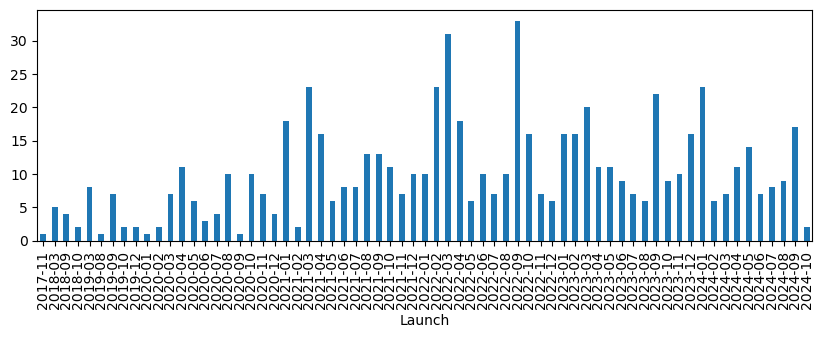

In [100]:
data['Launch'] = pd.to_datetime(data['Launch'])
year = data['Launch'].dt.year
year_month = data['Launch'].dt.to_period('M')
plt.figure(figsize=(10, 3))
year_month.value_counts().sort_index().plot(kind='bar')
data['Launch_month'] = year_month


Every month there are new phones launched. May be the Launch date can be precise to the month. Not necessary to have the exact date.
We can have a sliding window or something in future analysis.

### `Weight`: float

,phone_brand,phone_model,storage,ram,Launch,Weight,Display_Resolution,NFC,BATTERY,Features_Sensors,...,Screen_Refresh_Rate,USB_Type,USB_Version,Num_Color_Options,Supported_Video_Resolutions,Chipset_Manufacturer,Chipset_(nm),Num_CPU_Cores,log_storage,Launch_month


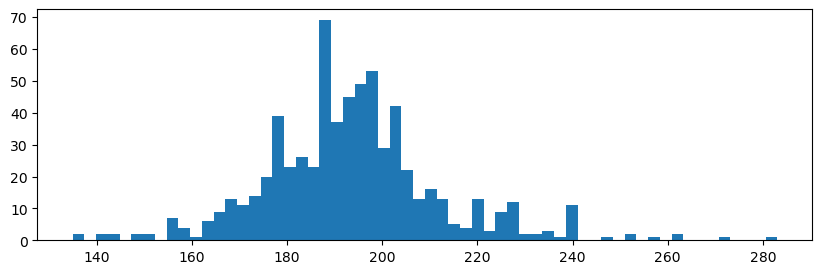

In [101]:
plt.figure(figsize=(10, 3))
plt.hist(data['Weight'], bins=60)
data[data['Weight'] > 300]

Some outliers (From Samsung). But most of them are around 150-250 grams.
Weight is also a interesting feature to consider. We can try to predict it from other features.

### 1.4 `Display_Resoltion`: str

(array([  4.,  89.,  23.,   0.,   0.,   0.,   4.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   3., 281.,  65.,
          7.,   0.,   9.,  11.,  10.,   0.,   8.,   2.,  29.,   0.,   4.,
         18.,  13.,   3.,   5.,   0.,   5.,   8.,   1.,   0.,   0.,   5.,
          7.,  10.,   9.,  30.,   0.,   0.,   0.,   0.,   0.,   3.,   0.,
          0.,   0.,   0.,   0.,   1.]),
 array([1000500. , 1076343.4, 1152186.8, 1228030.2, 1303873.6, 1379717. ,
        1455560.4, 1531403.8, 1607247.2, 1683090.6, 1758934. , 1834777.4,
        1910620.8, 1986464.2, 2062307.6, 2138151. , 2213994.4, 2289837.8,
        2365681.2, 2441524.6, 2517368. , 2593211.4, 2669054.8, 2744898.2,
        2820741.6, 2896585. , 2972428.4, 3048271.8, 3124115.2, 3199958.6,
        3275802. , 3351645.4, 3427488.8, 3503332.2, 3579175.6, 3655019. ,
        3730862.4, 3806705.8, 3882549.2, 3958392.6, 4034236. , 4110079.4,
        4185922.8, 4261766.2, 4337609.6, 4413453. , 4489296.4, 4565139.8

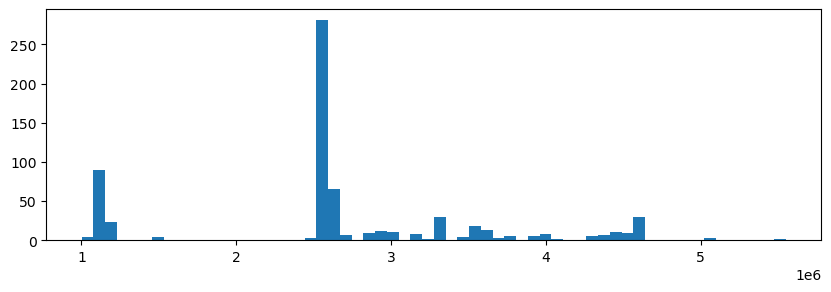

In [102]:
def total_pixels(row):
    w, h = [int(x) for x in row.split('x')]
    return w * h
data['total_pixels'] = data['Display_Resolution'].apply(total_pixels)
plt.figure(figsize=(10, 3))
plt.hist(data['total_pixels'], bins=60)


### 1.5 `PPI_Density`: int

(array([ 19.,  91.,   2.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   8.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   5.,
          4.,   0.,  14.,  58., 100.,  66.,  64.,  24.,   9.,   7.,   9.,
          1.,   5.,   7.,  30.,   9.,  61.,   0.,   0.,   5.,   0.,   3.,
          3.,   6.,   7.,   2.,   9.,   5.,   9.,  16.,   3.,   1.,   0.,
          0.,   2.,   0.,   1.,   2.]),
 array([260.        , 265.16666667, 270.33333333, 275.5       ,
        280.66666667, 285.83333333, 291.        , 296.16666667,
        301.33333333, 306.5       , 311.66666667, 316.83333333,
        322.        , 327.16666667, 332.33333333, 337.5       ,
        342.66666667, 347.83333333, 353.        , 358.16666667,
        363.33333333, 368.5       , 373.66666667, 378.83333333,
        384.        , 389.16666667, 394.33333333, 399.5       ,
        404.66666667, 409.83333333, 415.        , 420.16666667,
        425.33333333, 430.5       , 435.66666667, 440.83333333,
        446.  

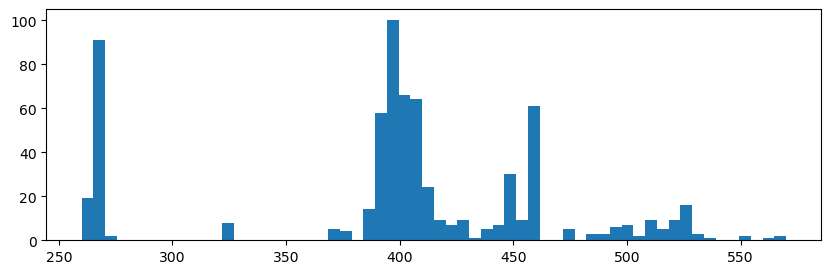

In [103]:
plt.figure(figsize=(10, 3))
plt.hist(data['PPI_Density'], bins=60)

### 1.6 `BATTERY`: int
\

(array([  4.,   2.,   2.,   0.,   8.,   6.,  19.,   5.,  16.,   4.,  26.,
         35.,  84.,  28.,  17., 381.,   7.,   9.,   1.,  13.]),
 array([1821.  , 2029.95, 2238.9 , 2447.85, 2656.8 , 2865.75, 3074.7 ,
        3283.65, 3492.6 , 3701.55, 3910.5 , 4119.45, 4328.4 , 4537.35,
        4746.3 , 4955.25, 5164.2 , 5373.15, 5582.1 , 5791.05, 6000.  ]),
 <BarContainer object of 20 artists>)

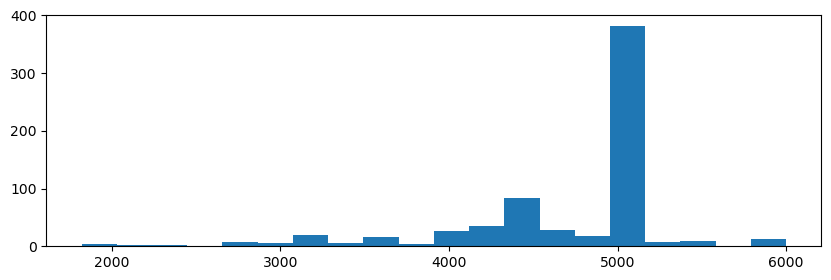

In [104]:
plt.figure(figsize=(10, 3))
plt.hist(data['BATTERY'], bins=20)

### 1.7 `Foldable`: 0-1

In [105]:
data.groupby('Foldable').size()

Foldable
0    642
1     25
dtype: int64

### 1.8 `price_USD`: float

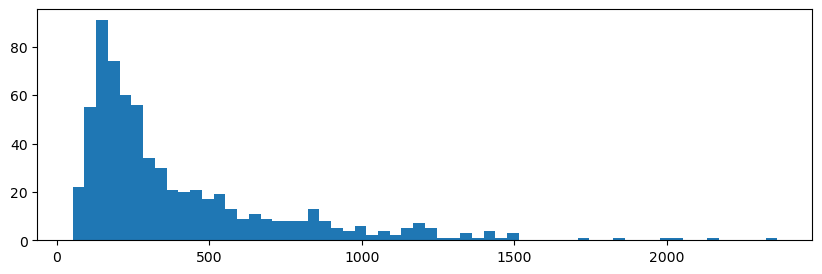

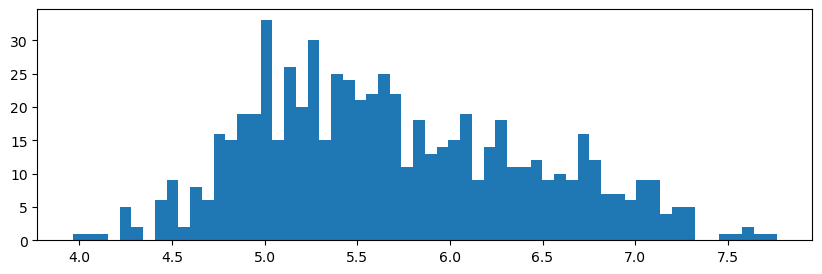

In [106]:
plt.figure(figsize=(10, 3))
plt.hist(data['price_USD'], bins=60)
plt.show()
plt.figure(figsize=(10, 3))
plt.hist(np.log(data['price_USD']), bins=60)
plt.show()

The distribution of price is right skewed. Log-price is approximately normal.

### 1.9 `Ratio`: float

In [107]:
data.groupby('Ratio').size()

Ratio
0.9      1
1.0      1
1.1      4
1.2      7
2.0     19
2.1    246
2.2    379
2.3     10
dtype: int64

### 1.10 `Screen_Tech`: str/ category

In [108]:
data.groupby('Screen_Tech').size()

Screen_Tech
AMOLED    324
LCD       222
OLED      121
dtype: int64

### 1.11 `Screen_Refresh_Rate`: str/ category

In [109]:
data.groupby('Screen_Refresh_Rate').size()

Screen_Refresh_Rate
60.0     175
90.0     150
120.0    303
144.0     32
165.0      7
dtype: int64

### 1.12 `USB_Type`: str/ category

In [110]:
data.groupby('USB_Type').size()

USB_Type
Lightning     45
Micro-USB     28
Type-C       594
dtype: int64

### 1.13 `Chipset_Manufacturer`: str/ category

In [ ]:
data.groupby('Chipset_Manufacturer').size()

Chipset_Manufacturer
Apple        63
Exynos       66
Google       20
JLQ           2
Kirin         7
MediaTek    202
Qualcomm    282
Unisoc       25
dtype: int64

### 1.14+ Other columns

In [112]:
data.groupby('USB_Version').size()

USB_Version
2.0    523
3.0    144
dtype: int64

In [113]:
data.groupby('Num_Color_Options').size()

Num_Color_Options
1       9
2      99
3     250
4     201
5      40
6      38
7       8
8       9
9       9
10      3
11      1
dtype: int64

In [114]:
data.groupby('Chipset_(nm)').size()

Chipset_(nm)
3.0      14
4.0     159
5.0      80
6.0     136
7.0      73
8.0      54
10.0      8
11.0     15
12.0    111
14.0      3
22.0      3
28.0      6
dtype: int64

In [116]:
data.groupby('Num_CPU_Cores').size()

Num_CPU_Cores
4       3
6      63
8     594
9       5
10      2
dtype: int64